In [1]:
import os 
os.environ['http_proxy']="http://172.17.0.1:7890"
os.environ['https_proxy']="http://172.17.0.1:7890"
os.environ['all_proxy']="http://172.17.0.1:7890"

In [1]:
import foolbox as fb
import numpy as np
import cv2
import torch
import torchvision
from pytorchcv.model_provider import get_model as ptcv_get_model
from PIL import Image
from matplotlib import pyplot as plt
from torchvision.transforms import transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# MNIST datasets in pytorch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

data_train = MNIST('./data',download=True,transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

data_test = MNIST('./data',train = False,download=True,transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

trainLoader = DataLoader(data_train, batch_size=64,shuffle=True)
testLoader = DataLoader(data_test, batch_size=1024)

In [41]:
for imgs,labs in testLoader:
    print(imgs[0])

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)


In [5]:
train_losses = []
train_counter = []
test_losses = []
log_interval = 10
test_counter = [i*len(trainLoader.dataset) for i in range(10 + 1)]

model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.5)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(trainLoader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(trainLoader.dataset),
            100. * batch_idx / len(trainLoader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(trainLoader.dataset)))
#         torch.save(model.state_dict(), '/results/model.pth')
#         torch.save(optimizer.state_dict(), '/results/optimizer.pth')
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testLoader:
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            test_loss /= len(testLoader.dataset)
            test_losses.append(test_loss)
            print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                test_loss, correct, len(testLoader.dataset),
                100. * correct / len(testLoader.dataset)))

In [6]:
test()
for epoch in range(1, 18):
    train(epoch)

test()

<ipython-input-4-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.2356, Accuracy: 108/10000 (1%)


Test set: Avg. loss: 0.2358, Accuracy: 214/10000 (2%)


Test set: Avg. loss: 0.2356, Accuracy: 320/10000 (3%)


Test set: Avg. loss: 0.2360, Accuracy: 415/10000 (4%)


Test set: Avg. loss: 0.2366, Accuracy: 510/10000 (5%)


Test set: Avg. loss: 0.2357, Accuracy: 612/10000 (6%)


Test set: Avg. loss: 0.2355, Accuracy: 719/10000 (7%)


Test set: Avg. loss: 0.2359, Accuracy: 822/10000 (8%)


Test set: Avg. loss: 0.2352, Accuracy: 929/10000 (9%)


Test set: Avg. loss: 0.1804, Accuracy: 1010/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.287640
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.289778
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.264085
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.280704
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.247383
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.210376
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.139359
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.083879
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.080602
Train Epoc

Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.275333
Train Epoch: 2 [39040/60000 (65%)]	Loss: 0.242039
Train Epoch: 2 [39680/60000 (66%)]	Loss: 0.634821
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.462529
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.442258
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.344737
Train Epoch: 2 [42240/60000 (70%)]	Loss: 0.835924
Train Epoch: 2 [42880/60000 (71%)]	Loss: 0.268016
Train Epoch: 2 [43520/60000 (72%)]	Loss: 0.501315
Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.448561
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.489691
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.440701
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.328554
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.319423
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.517890
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.294943
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.196737
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.507358
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.341834
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.541897


Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.470225
Train Epoch: 4 [26240/60000 (44%)]	Loss: 0.305342
Train Epoch: 4 [26880/60000 (45%)]	Loss: 0.254001
Train Epoch: 4 [27520/60000 (46%)]	Loss: 0.429034
Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.184692
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.236413
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.398042
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.294743
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.219517
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.376666
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.301341
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.358882
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.162970
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.345822
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.213883
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.278343
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.355168
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.145276
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.618676
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.211178


Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.391959
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.365946
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.168298
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.243284
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.118789
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.295866
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.331955
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.297252
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.242605
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.292438
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.147273
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.270101
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.248229
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.354020
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.105562
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.188344
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.248080
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.146264
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.236892
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.233958


Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.424974
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.364236
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.394507
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.271319
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.210873
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.255128
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.123189
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.347625
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.292026
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.088119
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.505897
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.249006
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.201825
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.208787
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.365233
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.476650
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.169739
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.141917
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.147912
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.245088
Train Epoch: 8 [10240/60000 (

Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.183583
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.111447
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.111164
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.147898
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.136142
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.389364
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.362135
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.113459
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.168150
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.192312
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.211337
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.231883
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.180859
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.118840
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.128793
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.273531
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.175710
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.145228
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.165737
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.112089


Train Epoch: 11 [30080/60000 (50%)]	Loss: 0.121404
Train Epoch: 11 [30720/60000 (51%)]	Loss: 0.210308
Train Epoch: 11 [31360/60000 (52%)]	Loss: 0.082204
Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.162541
Train Epoch: 11 [32640/60000 (54%)]	Loss: 0.098723
Train Epoch: 11 [33280/60000 (55%)]	Loss: 0.173377
Train Epoch: 11 [33920/60000 (57%)]	Loss: 0.159947
Train Epoch: 11 [34560/60000 (58%)]	Loss: 0.176865
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.164018
Train Epoch: 11 [35840/60000 (60%)]	Loss: 0.217420
Train Epoch: 11 [36480/60000 (61%)]	Loss: 0.217367
Train Epoch: 11 [37120/60000 (62%)]	Loss: 0.366144
Train Epoch: 11 [37760/60000 (63%)]	Loss: 0.212525
Train Epoch: 11 [38400/60000 (64%)]	Loss: 0.284830
Train Epoch: 11 [39040/60000 (65%)]	Loss: 0.156129
Train Epoch: 11 [39680/60000 (66%)]	Loss: 0.338154
Train Epoch: 11 [40320/60000 (67%)]	Loss: 0.172247
Train Epoch: 11 [40960/60000 (68%)]	Loss: 0.131481
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.122947
Train Epoch: 11 [42240/60000 (7

Train Epoch: 13 [13440/60000 (22%)]	Loss: 0.225372
Train Epoch: 13 [14080/60000 (23%)]	Loss: 0.100664
Train Epoch: 13 [14720/60000 (25%)]	Loss: 0.071949
Train Epoch: 13 [15360/60000 (26%)]	Loss: 0.095762
Train Epoch: 13 [16000/60000 (27%)]	Loss: 0.123182
Train Epoch: 13 [16640/60000 (28%)]	Loss: 0.183581
Train Epoch: 13 [17280/60000 (29%)]	Loss: 0.123465
Train Epoch: 13 [17920/60000 (30%)]	Loss: 0.028006
Train Epoch: 13 [18560/60000 (31%)]	Loss: 0.156723
Train Epoch: 13 [19200/60000 (32%)]	Loss: 0.193530
Train Epoch: 13 [19840/60000 (33%)]	Loss: 0.145113
Train Epoch: 13 [20480/60000 (34%)]	Loss: 0.254228
Train Epoch: 13 [21120/60000 (35%)]	Loss: 0.304318
Train Epoch: 13 [21760/60000 (36%)]	Loss: 0.114468
Train Epoch: 13 [22400/60000 (37%)]	Loss: 0.089167
Train Epoch: 13 [23040/60000 (38%)]	Loss: 0.150855
Train Epoch: 13 [23680/60000 (39%)]	Loss: 0.294044
Train Epoch: 13 [24320/60000 (41%)]	Loss: 0.210936
Train Epoch: 13 [24960/60000 (42%)]	Loss: 0.073267
Train Epoch: 13 [25600/60000 (4

Train Epoch: 14 [56960/60000 (95%)]	Loss: 0.256539
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.398501
Train Epoch: 14 [58240/60000 (97%)]	Loss: 0.097455
Train Epoch: 14 [58880/60000 (98%)]	Loss: 0.193664
Train Epoch: 14 [59520/60000 (99%)]	Loss: 0.141736
Train Epoch: 15 [0/60000 (0%)]	Loss: 0.152422
Train Epoch: 15 [640/60000 (1%)]	Loss: 0.071476
Train Epoch: 15 [1280/60000 (2%)]	Loss: 0.246132
Train Epoch: 15 [1920/60000 (3%)]	Loss: 0.269264
Train Epoch: 15 [2560/60000 (4%)]	Loss: 0.197252
Train Epoch: 15 [3200/60000 (5%)]	Loss: 0.340721
Train Epoch: 15 [3840/60000 (6%)]	Loss: 0.149260
Train Epoch: 15 [4480/60000 (7%)]	Loss: 0.126879
Train Epoch: 15 [5120/60000 (9%)]	Loss: 0.098612
Train Epoch: 15 [5760/60000 (10%)]	Loss: 0.207564
Train Epoch: 15 [6400/60000 (11%)]	Loss: 0.313911
Train Epoch: 15 [7040/60000 (12%)]	Loss: 0.203356
Train Epoch: 15 [7680/60000 (13%)]	Loss: 0.224852
Train Epoch: 15 [8320/60000 (14%)]	Loss: 0.101705
Train Epoch: 15 [8960/60000 (15%)]	Loss: 0.090037
Train Ep

Train Epoch: 16 [40320/60000 (67%)]	Loss: 0.047270
Train Epoch: 16 [40960/60000 (68%)]	Loss: 0.141441
Train Epoch: 16 [41600/60000 (69%)]	Loss: 0.142720
Train Epoch: 16 [42240/60000 (70%)]	Loss: 0.280320
Train Epoch: 16 [42880/60000 (71%)]	Loss: 0.122293
Train Epoch: 16 [43520/60000 (72%)]	Loss: 0.287751
Train Epoch: 16 [44160/60000 (74%)]	Loss: 0.044363
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.057067
Train Epoch: 16 [45440/60000 (76%)]	Loss: 0.210129
Train Epoch: 16 [46080/60000 (77%)]	Loss: 0.237609
Train Epoch: 16 [46720/60000 (78%)]	Loss: 0.126459
Train Epoch: 16 [47360/60000 (79%)]	Loss: 0.266456
Train Epoch: 16 [48000/60000 (80%)]	Loss: 0.150010
Train Epoch: 16 [48640/60000 (81%)]	Loss: 0.129779
Train Epoch: 16 [49280/60000 (82%)]	Loss: 0.221217
Train Epoch: 16 [49920/60000 (83%)]	Loss: 0.231053
Train Epoch: 16 [50560/60000 (84%)]	Loss: 0.316029
Train Epoch: 16 [51200/60000 (85%)]	Loss: 0.191244
Train Epoch: 16 [51840/60000 (86%)]	Loss: 0.110643
Train Epoch: 16 [52480/60000 (8

In [8]:
print(model)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [9]:
torch.save(model,"pyMNIST_model")

In [14]:
# attack = fb.attacks.L2CarliniWagnerAttack() #L2-CW
attack = fb.attacks.L2FastGradientAttack()    
atkname = "L2-FGSM"
# attack = fb.attacks.L2DeepFoolAttack()      #L2-DeepFool
# attack = fb.attacks.LinfDeepFoolAttack()    #Linf-DeepFool


In [33]:
model= model.eval() #changing evaluate 

In [15]:
def testAcc(model,dataloader):
    total = 0
    correct =0
    model = model.to(device)
    for data in dataloader:
        images,labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        _,pred = torch.max(outputs,1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return correct/total

In [44]:
preprocessing = dict(mean=[0.1307], std=[0.3081], axis=-3)
fmodel = fb.PyTorchModel(model,bounds=(0,1))
fmodel = fmodel.transform_bounds((0,1))

In [86]:
#get variable name 
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def gen_adv_raw(model,dataLoader,fmodel,eps,atkname):
    tempStore = torch.empty([0, 1, 28, 28]).to(device)
    tempLabel = torch.empty([0]).type(torch.IntTensor).to(device)
    dataname = namestr(dataLoader,globals())[0]
    ben_acc = 0.0
    adv_acc = 0.0
    count = 0
    for data in dataLoader:
        images,labels = data
        images,labels = images.to(device),labels.to(device)
        for i,x in enumerate(images):
            images[i]=(x-x.min()) / (x.max()-x.min())
#         raw_advs, clipped_advs, success = attack(fmodel, images, labels, epsilons=eps)
        raw_advs, clipped_advs, success = attack(fmodel, images, labels,epsilons=eps)
        
        index = success.type(torch.BoolTensor)
        cp = clipped_advs[index]
        labs = labels[index]
        labs = labs.type(torch.IntTensor).to(device)
        tempStore = torch.cat((tempStore,cp),0)
        tempLabel = torch.cat((tempLabel,labs),0)
    adv_acc = len(tempStore)/len(dataLoader.dataset)
    
    filename_data = "advMnistData-"+dataname+'-'+str(eps)+"-"+atkname+".pkl"
    filename_label = "advMnistLabel-"+dataname+'-'+str(eps)+"-"+atkname+".pkl"
    print(fb.accuracy(fmodel,tempStore,tempLabel))
    torch.save(tempStore,filename_data)
    torch.save(tempLabel,filename_label)
    return ben_acc,adv_acc

In [87]:
# attack = fb.attacks.L2CarliniWagnerAttack() #L2-CW
# attack = fb.attacks.L2FastGradientAttack()    

attack = fb.attacks.L2DeepFoolAttack()      #L2-DeepFool
# attack = fb.attacks.LinfDeepFoolAttack()    #Linf-DeepFool
atkname = "L2-DeepFool"
epsilons=[0.01,0.1,0.3,0.5,1,1.5,2,2.5,3,5]
for eps in epsilons:
    ben_acc,adv_acc = gen_adv_raw(model,testLoader,fmodel,eps,atkname)
    print(f"Attack method={atkname}, epsilon={eps}, ben_acc={ben_acc},adv_acc={adv_acc}")

<ipython-input-4-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.0
Attack method=L2-DeepFool, epsilon=0.01, ben_acc=0.0,adv_acc=0.0172
0.0
Attack method=L2-DeepFool, epsilon=0.1, ben_acc=0.0,adv_acc=0.023
0.0
Attack method=L2-DeepFool, epsilon=0.3, ben_acc=0.0,adv_acc=0.0417
0.0
Attack method=L2-DeepFool, epsilon=0.5, ben_acc=0.0,adv_acc=0.0673
0.0
Attack method=L2-DeepFool, epsilon=1, ben_acc=0.0,adv_acc=0.2008
0.00022084805823396891
Attack method=L2-DeepFool, epsilon=1.5, ben_acc=0.0,adv_acc=0.4528
0.0002669157984200865
Attack method=L2-DeepFool, epsilon=2, ben_acc=0.0,adv_acc=0.7493
0.0004326195048633963
Attack method=L2-DeepFool, epsilon=2.5, ben_acc=0.0,adv_acc=0.9246
0.0004066280380357057
Attack method=L2-DeepFool, epsilon=3, ben_acc=0.0,adv_acc=0.9837
9.999999747378752e-05
Attack method=L2-DeepFool, epsilon=5, ben_acc=0.0,adv_acc=1.0


In [89]:
# attack = fb.attacks.L2CarliniWagnerAttack() #L2-CW
# attack = fb.attacks.L2FastGradientAttack()    

# attack = fb.attacks.L2DeepFoolAttack()      #L2-DeepFool
attack = fb.attacks.LinfDeepFoolAttack()    #Linf-DeepFool
atkname = "Linf-DeepFool"
epsilons=[0.01,0.1,0.15,0.3,0.5,1,3,5]
for eps in epsilons:
    ben_acc,adv_acc = gen_adv_raw(model,testLoader,fmodel,eps,atkname)
    print(f"Attack method={atkname}, epsilon={eps}, ben_acc={ben_acc},adv_acc={adv_acc}")

<ipython-input-4-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.0
Attack method=Linf-DeepFool, epsilon=0.01, ben_acc=0.0,adv_acc=0.0243
0.0
Attack method=Linf-DeepFool, epsilon=0.1, ben_acc=0.0,adv_acc=0.2412
0.0
Attack method=Linf-DeepFool, epsilon=0.15, ben_acc=0.0,adv_acc=0.5729
0.0
Attack method=Linf-DeepFool, epsilon=0.3, ben_acc=0.0,adv_acc=0.9981
0.0
Attack method=Linf-DeepFool, epsilon=0.5, ben_acc=0.0,adv_acc=1.0
0.0
Attack method=Linf-DeepFool, epsilon=1, ben_acc=0.0,adv_acc=1.0
0.0
Attack method=Linf-DeepFool, epsilon=3, ben_acc=0.0,adv_acc=1.0
0.0
Attack method=Linf-DeepFool, epsilon=5, ben_acc=0.0,adv_acc=1.0


In [90]:
# attack = fb.attacks.L2CarliniWagnerAttack() #L2-CW
attack = fb.attacks.L2FastGradientAttack()    

# attack = fb.attacks.L2DeepFoolAttack()      #L2-DeepFool
# attack = fb.attacks.LinfDeepFoolAttack()    #Linf-DeepFool
atkname = "L2FGSM"
epsilons=[0.01,0.1,0.3,0.5,1,2,3,5]
for eps in epsilons:
    ben_acc,adv_acc = gen_adv_raw(model,testLoader,fmodel,eps,atkname)
    print(f"Attack method={atkname}, epsilon={eps}, ben_acc={ben_acc},adv_acc={adv_acc}")

<ipython-input-4-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.0
Attack method=L2FGSM, epsilon=0.01, ben_acc=0.0,adv_acc=0.0171
0.0
Attack method=L2FGSM, epsilon=0.1, ben_acc=0.0,adv_acc=0.0209
0.0
Attack method=L2FGSM, epsilon=0.3, ben_acc=0.0,adv_acc=0.0322
0.0
Attack method=L2FGSM, epsilon=0.5, ben_acc=0.0,adv_acc=0.0491
0.0
Attack method=L2FGSM, epsilon=1, ben_acc=0.0,adv_acc=0.1094
0.0
Attack method=L2FGSM, epsilon=2, ben_acc=0.0,adv_acc=0.3256
0.0
Attack method=L2FGSM, epsilon=3, ben_acc=0.0,adv_acc=0.6027
0.0
Attack method=L2FGSM, epsilon=5, ben_acc=0.0,adv_acc=0.8782


In [91]:
attack = fb.attacks.L2CarliniWagnerAttack(binary_search_steps=9, steps=10000, stepsize=0.01, confidence=0.4, initial_const=0.001, abort_early=True) #L2-CW
# attack = fb.attacks.L2FastGradientAttack()    
# attack = fb.attacks.L2DeepFoolAttack()      #L2-DeepFool
# attack = fb.attacks.LinfDeepFoolAttack()    #Linf-DeepFool
atkname = "L2-CW"
epsilons=[1]
for eps in epsilons:
    ben_acc,adv_acc = gen_adv_raw(model,testLoader,fmodel,eps,atkname)
    print(f"Attack method={atkname}, epsilon={eps}, ben_acc={ben_acc},adv_acc={adv_acc}")

<ipython-input-4-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.0
Attack method=L2-CW, epsilon=1, ben_acc=0.0,adv_acc=0.2635


In [61]:
attack = fb.attacks.L2CarliniWagnerAttack(binary_search_steps=9, steps=10000, stepsize=0.01, confidence=1, initial_const=0.001, abort_early=True) #L2-CW
# attack = fb.attacks.L2FastGradientAttack()    
# attack = fb.attacks.L2DeepFoolAttack()      #L2-DeepFool
# attack = fb.attacks.LinfDeepFoolAttack()    #Linf-DeepFool
atkname = "L2-CW"
epsilons=[0.01,0.1,0.3,0.5,1,2,3]
for eps in epsilons:
    ben_acc,adv_acc = gen_adv_raw(model,testLoader,fmodel,eps,atkname)
    print(f"Attack method={atkname}, epsilon={eps}, ben_acc={ben_acc},adv_acc={adv_acc}")

<ipython-input-26-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Attack method=L2-CW, epsilon=0.01, ben_acc=0.9814094364643097,adv_acc=0.9813117802143096
Attack method=L2-CW, epsilon=0.1, ben_acc=0.9814094364643097,adv_acc=0.9768734037876129
Attack method=L2-CW, epsilon=0.3, ben_acc=0.9814094364643097,adv_acc=0.9601004421710968
Attack method=L2-CW, epsilon=0.5, ben_acc=0.9814094364643097,adv_acc=0.9337890625
Attack method=L2-CW, epsilon=1, ben_acc=0.9814094364643097,adv_acc=0.7824796676635742
Attack method=L2-CW, epsilon=2, ben_acc=0.9814094364643097,adv_acc=0.10992705672979355
Attack method=L2-CW, epsilon=3, ben_acc=0.9814094364643097,adv_acc=0.00146484375


array([[[0.5779042 , 0.58188975, 0.605803  , ..., 0.49420774,
         0.45036674, 0.41051126],
        [0.55399096, 0.5500054 , 0.58188975, ..., 0.49022222,
         0.44638118, 0.42246792],
        [0.5500054 , 0.5500054 , 0.5779042 , ..., 0.50217885,
         0.46630892, 0.42645344],
        ...,
        [0.21920507, 0.11558086, 0.07173984, ..., 0.09963867,
         0.        , 0.10760976],
        [0.19130622, 0.14347966, 0.08768203, ..., 0.05181211,
         0.06376874, 0.02789883],
        [0.16340739, 0.1713785 , 0.12753747, ..., 0.04384102,
         0.08369648, 0.03188437]],

       [[0.4030604 , 0.39901477, 0.4192429 , ..., 0.3342847 ,
         0.31810215, 0.2938284 ],
        [0.4030604 , 0.3949691 , 0.41115162, ..., 0.3342847 ,
         0.31810215, 0.3059653 ],
        [0.3949691 , 0.3909235 , 0.39901477, ..., 0.34642157,
         0.3342847 , 0.3100109 ],
        ...,
        [0.45160797, 0.35451284, 0.3059653 , ..., 0.34237596,
         0.20887019, 0.2938284 ],
        [0.4

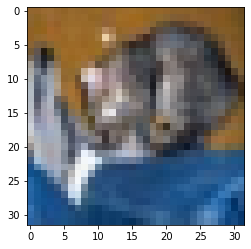

In [208]:
im = images[0].cpu()
show(im)

array([[[0.4386755 , 0.50605035, 0.46983054, ..., 0.7186191 ,
         0.37106797, 0.4673666 ],
        [0.42326224, 0.4342678 , 0.38337395, ..., 0.17982589,
         0.34792072, 0.5142908 ],
        [0.45151532, 0.43659484, 0.4740466 , ..., 0.7933994 ,
         0.31743643, 0.46862596],
        ...,
        [0.4551291 , 0.41671914, 0.4715279 , ..., 0.49120513,
         0.45063925, 0.44384292],
        [0.4718359 , 0.4697484 , 0.4188169 , ..., 0.45429066,
         0.42811823, 0.44531184],
        [0.43729982, 0.47628465, 0.42983273, ..., 0.45484677,
         0.4462076 , 0.44435793]],

       [[0.44728556, 0.5152216 , 0.45360965, ..., 0.71228135,
         0.36514086, 0.49043173],
        [0.43649903, 0.45063925, 0.4108057 , ..., 0.06983875,
         0.34073424, 0.62730306],
        [0.47614095, 0.5036275 , 0.5266515 , ..., 0.76406497,
         0.35146603, 0.41325596],
        ...,
        [0.44406876, 0.38535878, 0.49817944, ..., 0.47553864,
         0.44586197, 0.44943467],
        [0.4

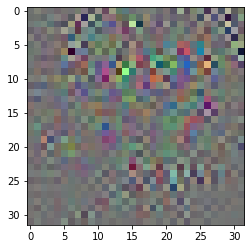

In [209]:
im = pertu[0].cpu()
show(im)

In [261]:

img_adv1 = copy.deepcopy(advs_[0])

In [211]:
def get_single_mask(num):
    x_b = np.zeros((32,32))

    for i in range(num):
        x_axis = np.random.randint(1, 31)
        y_axis = np.random.randint(1, 31)
        case_radom = np.random.randint(1, 5)
        
        if (case_radom == 1) :
            x_b[x_axis][y_axis] = 1
        
        elif (case_radom == 2) :
            x_b[x_axis][y_axis+1] = 1
        
        elif (case_radom == 3) :
            x_b[x_axis+1][y_axis] = 1
        
        elif (case_radom == 4) :
            x_b[x_axis+1][y_axis+1] = 1
    
#     x_b_msk = np.img_as_ubyte(x_b)
    return x_b

In [212]:
try_times = 11
def get_masks(num):

    mask = np.expand_dims(get_single_mask(num), axis = 0)
    for k in range(try_times-1):
        mask2 = np.expand_dims(get_single_mask(num), axis = 0)
        mask = np.concatenate((mask, mask2))
    
    # print(mask.shape) ->  (11, 224, 224)
    return mask

In [272]:
# mask = get_masks(300)
dst_adv.shape

(32, 32, 3)

In [230]:
src = img_adv1.cpu().detach().numpy()

In [231]:
src = np.transpose(src,[2,1,0])

In [276]:
classes[pred[0]]

'cat'

In [144]:
rgb_img = cv2.cvtColor(np.expand_dims(mask[5],axis=2), cv2.COLOR_BGR2RGB)

error: OpenCV(4.5.2) /tmp/pip-req-build-13uokl4r/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [171]:
new = np.expand_dims(mask[5],axis=2)

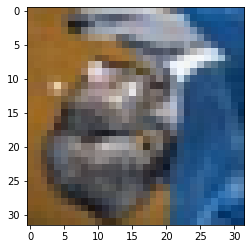

In [237]:
plt.imshow(src,cmap='Greys_r')

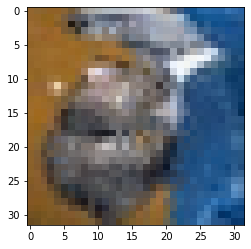

In [245]:
plt.imshow(dst_adv,cmap='Greys_r')

In [24]:
mnist_adv = torch.load("./advsamples/advMnistData-testLoader-3-L2-CW.pkl")
mnist_labs = torch.load("./advsamples/advMnistLabel-testLoader-3-L2-CW.pkl")
fmodel = fb.PyTorchModel(model,bounds=(0,1))
fb.accuracy(fmodel,mnist_adv,mnist_labs)

<ipython-input-4-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.9231847524642944

In [252]:
model.features

Sequential(
  (init_block): ConvBlock(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activ): ReLU(inplace=True)
  )
  (stage1): Sequential(
    (unit1): ResUnit(
      (body): ResBlock(
        (conv1): ConvBlock(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activ): ReLU(inplace=True)
        )
        (conv2): ConvBlock(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (activ): ReLU(inplace=True)
    )
    (unit2): ResUnit(
      (body): ResBlock(
        (conv1): ConvBlock(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), str

In [88]:
mnist_adv = torch.load("./advMnistData-testLoader-3-L2-DeepFool.pkl")
mnist_labs = torch.load("./advMnistLabel-testLoader-3-L2-DeepFool.pkl")

fb.accuracy(fmodel,mnist_adv,mnist_labs)

<ipython-input-4-3a1a5a310de2>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.0004066280380357057